In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pydot
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import statsmodels.api as srm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,roc_curve, auc,r2_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
sns.set()

In [2]:
# Se carga la base de datos
data_set = pd.read_csv("X_y_train.csv")

In [3]:
# Se muestran la primeras 20 observaciones
data_set.head(20)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32213,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
1,36907,59,admin.,married,secondary,no,145,yes,no,telephone,12,may,556,2,287,13,success,yes
2,1447,53,management,married,tertiary,no,1786,yes,no,unknown,8,may,66,2,-1,0,unknown,no
3,10973,37,management,married,tertiary,no,1170,no,yes,unknown,17,jun,153,3,-1,0,unknown,no
4,26982,46,entrepreneur,married,primary,no,829,no,yes,telephone,21,nov,81,7,-1,0,unknown,no
5,13110,58,retired,married,unknown,no,-230,no,yes,cellular,8,jul,133,2,-1,0,unknown,no
6,15305,52,technician,married,secondary,no,2102,yes,no,cellular,18,jul,292,2,-1,0,unknown,no
7,33941,35,admin.,married,secondary,no,-312,no,no,cellular,30,apr,116,1,21,1,failure,no
8,37160,34,blue-collar,single,secondary,no,2764,yes,no,cellular,13,may,158,1,357,1,failure,no
9,1555,43,management,divorced,tertiary,no,0,yes,no,unknown,8,may,123,2,-1,0,unknown,no


### Información Archivo "data_description.txt" (variables en la base de datos):
   ### bank client data:
   0 - Id: numeric id to identify each observation.
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")

   ### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means 
  client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  ### Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")




### Exploración y Visualización de Datos
En la siguiente sección, se realiza la etapa 3 de un proyecto de ML, la cual consiste en analizar las variables del modelo para así determinar el tratamiento y posterior selección de las mismas.

In [4]:
# Se muestra el tipo de variables de la base
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         36168 non-null  int64 
 1   age        36168 non-null  int64 
 2   job        36168 non-null  object
 3   marital    36168 non-null  object
 4   education  36168 non-null  object
 5   default    36168 non-null  object
 6   balance    36168 non-null  int64 
 7   housing    36168 non-null  object
 8   loan       36168 non-null  object
 9   contact    36168 non-null  object
 10  day        36168 non-null  int64 
 11  month      36168 non-null  object
 12  duration   36168 non-null  int64 
 13  campaign   36168 non-null  int64 
 14  pdays      36168 non-null  int64 
 15  previous   36168 non-null  int64 
 16  poutcome   36168 non-null  object
 17  y          36168 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.0+ MB
None


In [5]:
# Se realiza estadística descriptiva de la base
data_set.describe(include='all').round(1)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,36168.0,36168.0,36168,36168,36168,36168,36168.0,36168,36168,36168,36168.0,36168,36168.0,36168.0,36168.0,36168.0,36168,36168
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,7740,21763,18541,35531,NaN,20125,30382,23429,NaN,11016,NaN,NaN,NaN,NaN,29563,31937
mean,22598.1,41.0,NaN,NaN,NaN,NaN,1366.6,NaN,NaN,NaN,15.8,NaN,257.9,2.8,40.2,0.6,NaN,NaN
std,13053.6,10.6,NaN,NaN,NaN,NaN,3086.8,NaN,NaN,NaN,8.3,NaN,258.2,3.1,100.1,2.4,NaN,NaN
min,0.0,18.0,NaN,NaN,NaN,NaN,-8019.0,NaN,NaN,NaN,1.0,NaN,0.0,1.0,-1.0,0.0,NaN,NaN
25%,11295.8,33.0,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,8.0,NaN,103.0,1.0,-1.0,0.0,NaN,NaN
50%,22603.5,39.0,NaN,NaN,NaN,NaN,450.0,NaN,NaN,NaN,16.0,NaN,179.0,2.0,-1.0,0.0,NaN,NaN
75%,33878.2,48.0,NaN,NaN,NaN,NaN,1424.0,NaN,NaN,NaN,21.0,NaN,318.0,3.0,-1.0,0.0,NaN,NaN


In [6]:
# Se contabiliza el número de missing values por variable
data_set.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Se analiza el número de observaciones por edad distinta
data_set['age'].value_counts().sort_index()

18    11
19    30
20    41
21    65
22    98
      ..
90     2
92     1
93     1
94     1
95     2
Name: age, Length: 77, dtype: int64

In [8]:
# Se analiza el número de categorías distintas en la variable "job"
data_set['job'].value_counts().sort_index()

admin.           4125
blue-collar      7740
entrepreneur     1178
housemaid        1018
management       7592
retired          1799
self-employed    1277
services         3313
student           743
technician       6101
unemployed       1048
unknown           234
Name: job, dtype: int64

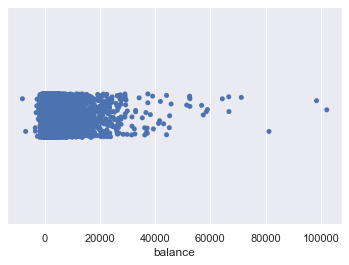

In [9]:
# Se plotea la concentración de observaciones de acuerdo a la variable "balance"
sn.stripplot(x='balance', data=data_set) 
plt.show()

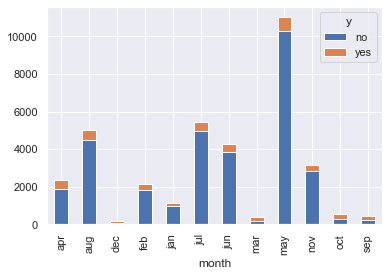

In [10]:
# Se analiza la concentración de la variable dependiente (y) por mes del año
data_set.groupby(['month', 'y']).size().unstack().plot.bar(stacked=True)
plt.show()

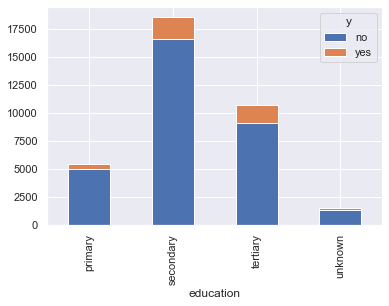

In [11]:
# Se analiza la concentración de la variable dependiente (y) por el nivel educacional de las personas
data_set.groupby(['education', 'y']).size().unstack().plot.bar(stacked=True)
plt.show()

In [12]:
data_set.groupby(['job', 'y']).size().sort_index()

job            y  
admin.         no     3628
               yes     497
blue-collar    no     7175
               yes     565
entrepreneur   no     1084
               yes      94
housemaid      no      927
               yes      91
management     no     6541
               yes    1051
retired        no     1385
               yes     414
self-employed  no     1122
               yes     155
services       no     3014
               yes     299
student        no      527
               yes     216
technician     no     5444
               yes     657
unemployed     no      885
               yes     163
unknown        no      205
               yes      29
dtype: int64

In [13]:
# Número de obs. por número de contactos previos y resultado final de la campaña
data_set.groupby(['previous', 'y']).size().unstack()

y,no,yes
previous,,
0,26852.0,2708.0
1,1761.0,454.0
2,1318.0,355.0
3,676.0,245.0
4,417.0,142.0
5,281.0,103.0
6,149.0,68.0
7,123.0,47.0
8,75.0,31.0


In [14]:
# Número de obs. por número de contactos previos y resultado final de la campaña anterior
data_set.groupby(['poutcome', 'y']).size().unstack()

y,no,yes
poutcome,,
failure,3437,491
other,1208,249
success,438,782
unknown,26854,2709


## Limpieza y transformación de datos
A continuación, se define una función que realiza modificaciones a las variables de la base en cuestión. En particular, se realiza el tratamiento de valores perdidos, extremos y creación de nuevas variables.

In [15]:
def limpieza(data_set):
    
    # Se elimina ID de la base, dado que es solo un indicador de filas
    var_id = data_set['Id']
    del data_set['Id']

    
    # Se reemplaza al valor outlier por el maximo anterior
    data_set.loc[data_set['previous'] > 60, ['previous']] = 58
    
    # aplicamos logaritmo a balance, haciendo un ajuste para que todos sus valores estén sobre 0
    
    min_value = abs(data_set['balance'].min())
    data_set['ln_balance'] = np.log(data_set['balance'] + min_value + 1)

    del data_set['balance']
    
    #eliminación de observación con valor nan
    
    data_set = data_set.dropna(axis=0, how='any')

    # Se codifican las variables binarias: "default", "housing", "loan" e "y".
    reemplazo = {'yes': 1, 'no': 0}
    
    #aplicar el reemplazo en la columna
    data_set['default'] = data_set['default'].replace(reemplazo)
    data_set['housing'] = data_set['housing'].replace(reemplazo)
    data_set['loan'] = data_set['loan'].replace(reemplazo)
    

    #one hot encoding 
    data_set = pd.get_dummies(data_set, columns = ["job"])
    data_set = pd.get_dummies(data_set, columns = ["contact"])
    data_set = pd.get_dummies(data_set, columns = ["poutcome"])

    # Creación y Transformación de una serie de variables a partir de otras

    ## "Romantic commitment" a partir de "marital"
    
    #Diccionario
    lovedict = {'single': 0, 'divorced': 1, 'married': 2 }
    data_set['marital'] = data_set['marital'].map(lovedict)
    data_set.rename(columns={'marital': 'rcommitment'})
    
    #Codificación de education
    edudict = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3 }
    data_set['education'] = data_set['education'].map(edudict)
    
    #----------------------------------------------------------------------------------------#

    ## Agrupación de la variable "day" en base a dividir el mes en grupos de 10 días
    
    def daydict(dia):
        if dia <= 10:
            return "iniciodemes"
        elif dia <= 20:
            return "quincena"
        else:
            return "findemes"
        
    data_set['day'] = data_set['day'].map(daydict)
    data_set = pd.get_dummies(data_set, columns = ["day"])
    
    #----------------------------------------------------------------------------------------#

    ## Agrupación de la variable "month" en trimestres, aproximado por la estaciones del año
    def seasons(mes):
        if mes in ['mar', 'apr', 'may']:
            return "spring"
        elif mes in ['jun', 'jul', 'aug']:
            return "summer"
        elif mes in ['sep', 'oct', 'nov']:
            return "fall"
        else:
            return "winter"
    
        
    data_set['month'] = data_set['month'].map(seasons)
    data_set = pd.get_dummies(data_set, columns = ["month"])
    
    # Debido a que la mayooría de las observaciones son (-1), es decir, los clientes no fueron contactados anteriormente, 
    # se decide crear una variable binaria que tome el valor 0 si el cliente no fue previamente contactado, y 1 en caso contrario.

    def pdaysaux(days):
        if days == -1:
            return 0
        else:
            return 1
    
        
    data_set['pdays'] = data_set['pdays'].map(pdaysaux)
    data_set.rename(columns={'pdays': 'contactedbefore'})
    
    data_set['previous'] = data_set['previous'].round().astype(int)
    return data_set, var_id


In [16]:
data_set = limpieza(data_set)[0]

reemplazo = {'yes': 1, 'no': 0}
data_set['y'] = data_set['y'].replace(reemplazo)

print(data_set)

       age  marital  education  default  housing  loan  duration  campaign  \
0       35        0          3        0        1     0       185         1   
1       59        2          2        0        1     0       556         2   
2       53        2          3        0        1     0        66         2   
3       37        2          3        0        0     1       153         3   
4       46        2          1        0        0     1        81         7   
...    ...      ...        ...      ...      ...   ...       ...       ...   
36163   78        1          1        0        0     0        97         1   
36164   44        2          3        0        1     0       141         3   
36165   42        0          2        0        1     0       293         1   
36166   34        2          3        0        0     0       145         2   
36167   60        2          1        0        1     0       219         1   

       pdays  previous  ...  poutcome_other  poutcome_success  

In [17]:
# A continuación se normaliza la data, y se crea un nuevo dataframe(data_set_scaled) con la data resultante.

VarObj = data_set['y'] 
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)
data_set_scaled['y'] = VarObj
print(data_set_scaled)

            age  marital  education  default  housing  loan  duration  \
0      0.220779      0.0   1.000000      0.0      1.0   0.0  0.037617   
1      0.532468      1.0   0.666667      0.0      1.0   0.0  0.113054   
2      0.454545      1.0   1.000000      0.0      1.0   0.0  0.013420   
3      0.246753      1.0   1.000000      0.0      0.0   1.0  0.031110   
4      0.363636      1.0   0.333333      0.0      0.0   1.0  0.016470   
...         ...      ...        ...      ...      ...   ...       ...   
36163  0.779221      0.5   0.333333      0.0      0.0   0.0  0.019723   
36164  0.337662      1.0   1.000000      0.0      1.0   0.0  0.028670   
36165  0.311688      0.0   0.666667      0.0      1.0   0.0  0.059577   
36166  0.207792      1.0   1.000000      0.0      0.0   0.0  0.029484   
36167  0.545455      1.0   0.333333      0.0      1.0   0.0  0.044530   

       campaign  pdays  previous  ...  poutcome_other  poutcome_success  \
0      0.000000    1.0  0.017241  ...           

<AxesSubplot:>

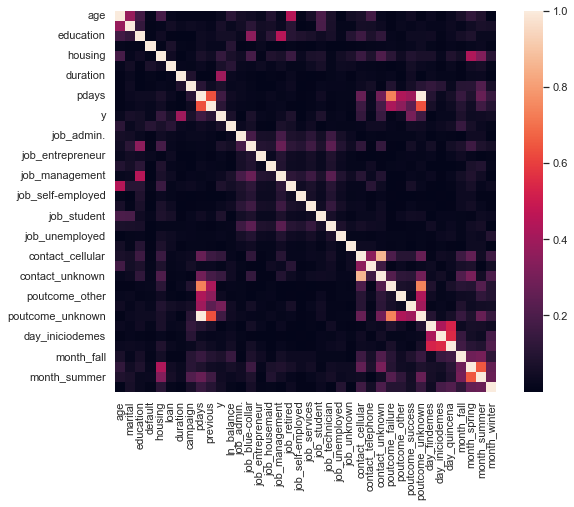

In [18]:
# Se realiza un heat-map con las correlaciones entre las variables
corrmat = data_set_scaled.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

In [19]:
#hay una variable redundante por su correlación casi 1 con pdays
del data_set_scaled['poutcome_unknown']

Finalmente, se separa la base de train y test (80-20)%, respectivamente.

In [20]:
y = data_set_scaled['y']
del data_set_scaled['y']
X = data_set_scaled

In [21]:
#Separamos nuestra base en train y test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print(y_train.value_counts())

0    25503
1     3431
Name: y, dtype: int64


En relación a la selección de las variables, ésta se justifica en base a la idea de que más información es preferible a menos información. Bajo la lógica anterior, se decide incluir como categorías aparte, y posteriormente como variables extra, aquellos registros denominados como "unknown" y no eliminar dichas observaciones.

En el escenario en que las variables incluidas no aporten capacidad predictiva a los modelos a estimar a continuación, se debiese ver reflejado en sus respectivos "weights" asociados.

Finalmente, los valores perdidos se solucionan mediante la normalización realizada anteriormente.

In [23]:
# Para solucionar el desbalanceo de la base, se realiza oversampling
sm = SMOTE() 
X_train_n, y_train_n = sm.fit_resample(X_train, y_train)
X_train_n = pd.DataFrame(X_train_n, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [24]:
# Optimización hiper parámetros de la regresión logística

parametros = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]}

regresion = LogisticRegression(random_state=0)
grid_search = GridSearchCV(regresion, parametros, cv=5)
grid_search.fit(X_train_n, y_train_n)
mejores_parametros = grid_search.best_params_
print("Mejores hiperparámetros:", mejores_parametros)
reg = LogisticRegression(random_state=0, **mejores_parametros)
reg.fit(X_train_n, y_train_n)

C:\Users\Patrickj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Patrickj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\Patrickj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejores hiperparámetros: {'C': 10.0, 'penalty': 'l2'}


C:\Users\Patrickj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0, random_state=0)

Acierto Regresión Logística: 0.84
AUC: 0.821
           classifiers                                                fpr  \
0  Regresión logística  [0.0, 0.0, 0.00031084861672365556, 0.000310848...   

                                                 tpr       auc  
0  [0.0, 0.00125, 0.00125, 0.005, 0.005, 0.00625,...  0.820562  


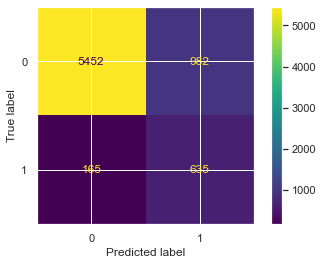

In [25]:
#predict
Y_pred_regresion = reg.predict(X_test)

#acuracy
Ac_reg = reg.score(X_test, y_test)
print('Acierto Regresión Logística: {:.2f}'.format(Ac_reg))


#matriz de confusión
cm = confusion_matrix(y_test, Y_pred_regresion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

#AUC
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, Y_pred_regresion)
print('AUC: %.3f' % auc)

#resultados
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table = result_table.append({'classifiers': 'Regresión logística','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
print(result_table)

In [26]:
# Optimización hiper parámetros del Árbol de decisión
parametros = {
    'max_leaf_nodes': [5, 10, 20, 25],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4, 6]
}

arbol = DecisionTreeClassifier(criterion='entropy')
tree_cv = GridSearchCV(arbol, parametros, cv=10)

tree_cv.fit(X_train, y_train)

mejores_parametros = tree_cv.best_params_

model_tree = Pipeline(steps=[
    ('sampling', SMOTE()),
    ('tree', DecisionTreeClassifier(criterion='entropy', **mejores_parametros))
])

model_tree.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE()),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_leaf_nodes=10))])

In [27]:
# Se imprimen los hiper parámetros óptimos
mejores_parametros = tree_cv.best_params_
print("Mejores hiperparámetros:", mejores_parametros)

Mejores hiperparámetros: {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_split': 2}


Acierto árbol de decisión: 0.90
AUC: 0.656
           classifiers                                                fpr  \
0  Regresión logística  [0.0, 0.0, 0.00031084861672365556, 0.000310848...   
1    Árbol de decisión  [0.0, 0.0023313646254274167, 0.011035125893689...   

                                                 tpr       auc  
0  [0.0, 0.00125, 0.00125, 0.005, 0.005, 0.00625,...  0.820562  
1  [0.0, 0.03875, 0.15375, 0.33875, 0.4875, 0.675...   0.65562  


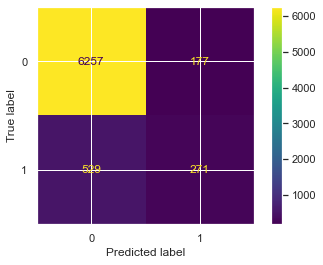

In [28]:
# Se asignan los hiper parámetros óptimos al modelo y se estima
arbol_optimizado = DecisionTreeClassifier(criterion='entropy', **mejores_parametros)

arbol_optimizado.fit(X_train, y_train)
Y_pred_tree = arbol_optimizado.predict(X_test)

#accuracy
Ac_tree = arbol_optimizado.score(X_test, y_test)
print('Acierto árbol de decisión: {:.2f}'.format(Ac_tree))

#matriz de confusión
cm = confusion_matrix(y_test, Y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#AUC
fpr, tpr, thresholds = roc_curve(y_test, arbol_optimizado.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, Y_pred_tree)
print('AUC: %.3f' % auc)

#resultados a la tabla
result_table = result_table.append({'classifiers': 'Árbol de decisión','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
print(result_table)


C:\Users\Patrickj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejores hiperparámetros:
{'red__alpha': 0.001, 'red__hidden_layer_sizes': 11, 'red__max_iter': 50}


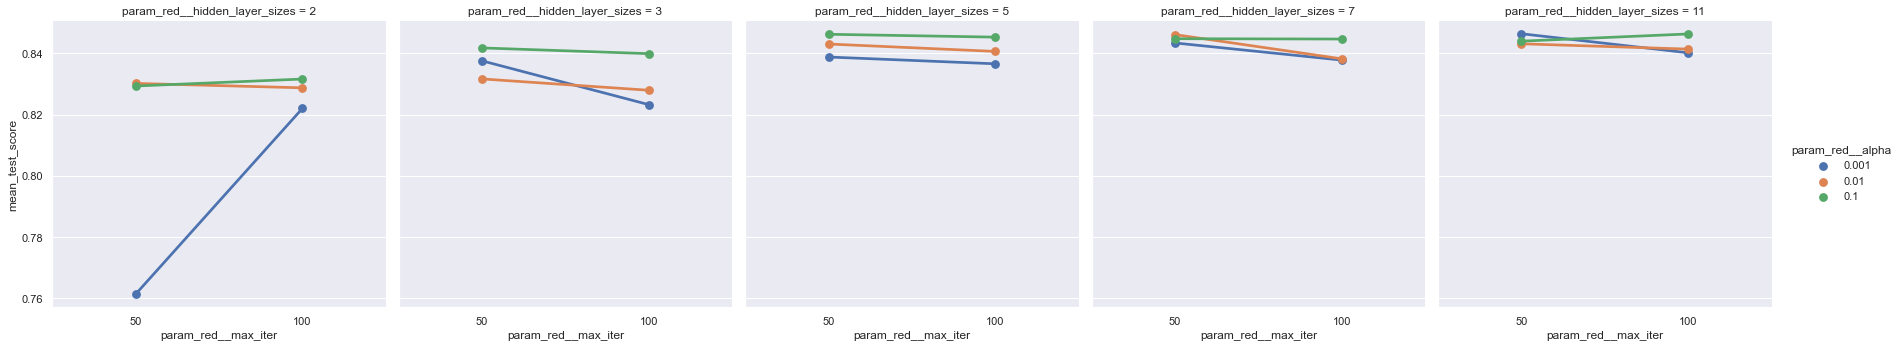

In [29]:
# Optimización hiper parámetros de la Red Neuronal

red = MLPClassifier(solver='adam', activation='relu')

# Hiper Parámetros a testear mediante Grid Search
max_iter = [50,100]
alpha = [0.1, 0.01, 0.001]
hidden_layer_sizes = [2,3,5,7,11]
parametros=  dict(red__max_iter = max_iter,               
                  red__alpha = alpha,
                  red__hidden_layer_sizes = hidden_layer_sizes)

#grid search
model_red = Pipeline(steps=[
        ('sampling', SMOTE()),
        ('red', red)])

red_cv=GridSearchCV(model_red,parametros,n_jobs=2,cv=10)
red_cv.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(red_cv.best_params_)

red = red_cv.best_estimator_
grid_results = pd.DataFrame(red_cv.cv_results_)
sn.catplot(x="param_red__max_iter", y="mean_test_score", hue="param_red__alpha", kind="point", col="param_red__hidden_layer_sizes",data=grid_results);

Acierto de red neuronal: 0.84
AUC: 0.830


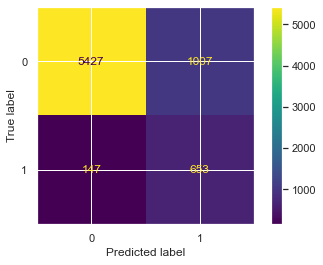

In [30]:
# accuracy
Ac_red = red.score(X_test, y_test) #con el modelo entrenado en entrenamiento
print('Acierto de red neuronal: {:.2f}'.format(Ac_red))

Y_pred_red = red.predict(X_test)

# matriz de confusión
cm = confusion_matrix(y_test, Y_pred_red)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# AUC
fpr, tpr, thresholds = roc_curve(y_test, red.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, Y_pred_red)
print('AUC: %.3f' % auc)
#tabla de resultados
result_table = result_table.append({'classifiers': 'Red neuronal','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)

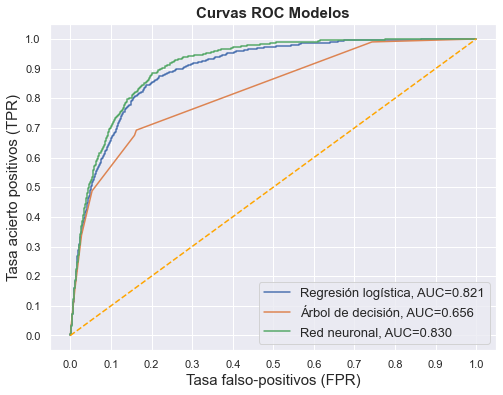

In [31]:
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))   
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Tasa falso-positivos (FPR)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Tasa acierto positivos (TPR)", fontsize=15)
plt.title('Curvas ROC Modelos', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

Como se observa en el gráfico anterior, al considerar los valores del AUC de cada modelo, se decide continuar utilizando el modelo de red neuronal, al contar con el valor más alto.

In [32]:
# Cargar los datos de prueba desde el archivo CSV
data_test = pd.read_csv('X_test.csv')
print (data_test)

         Id  age           job  marital  education default  balance housing  \
0     32936   34   blue-collar  married   tertiary      no      551     yes   
1      1643   29   blue-collar  married  secondary      no        0      no   
2      8565   31  entrepreneur   single   tertiary      no        0      no   
3      7144   43    management  married    unknown      no     5172     yes   
4     32575   54    management  married  secondary      no     -133     yes   
...     ...  ...           ...      ...        ...     ...      ...     ...   
9038  35507   31        admin.  married  secondary      no      799     yes   
9039   2186   27      services   single  secondary      no      118     yes   
9040  41085   46   blue-collar  married    unknown      no      336     yes   
9041   4735   31   blue-collar  married  secondary      no      897     yes   
9042  34290   45    technician  married  secondary      no     1998      no   

     loan   contact  day month  duration  campaign 

Ahora bien, el tratamiento del test set corresponde al mismo realizado en el train set.

In [33]:
#Se aplica la función de limpieza definida anteriormente
data_test = limpieza(data_test)

#Se recuperan los objetos resultantes de la función
var_id = data_test[1]
data_test = data_test[0]

#Se elimina una variable redundante hallada tras la transformación
del data_test['poutcome_unknown']

print(data_test)

#Se normaliza el test set
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_test)
data_test_scaled = pd.DataFrame(scaler_data.transform(data_test), index=data_test.index, columns=data_test.columns)


      age  marital  education  default  housing  loan  duration  campaign  \
0      34        2          3        0        1     0       115         2   
1      29        2          2        0        0     0       215         1   
2      31        0          3        0        0     0        31         5   
3      43        2          0        0        1     0        57         3   
4      54        2          2        0        1     0        76         1   
...   ...      ...        ...      ...      ...   ...       ...       ...   
9038   31        2          2        0        1     0       556         3   
9039   27        0          2        0        1     1        53         1   
9040   46        2          0        0        1     0       260         3   
9041   31        2          2        0        1     0        26         2   
9042   45        2          2        0        0     0       237         5   

      pdays  previous  ...  poutcome_failure  poutcome_other  \
0         1

In [34]:
# Se reentrena el modelo sobre toda la base 
red_cv.fit(X, y)

C:\Users\Patrickj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('red', MLPClassifier())]),
             n_jobs=2,
             param_grid={'red__alpha': [0.1, 0.01, 0.001],
                         'red__hidden_layer_sizes': [2, 3, 5, 7, 11],
                         'red__max_iter': [50, 100]})

Finalmente, se realizan las predicciones sobre la variable dependiente de interés a partir de las características de cada observación y resultados del modelo estimado. Asimismo, se exporta un archivo ".csv" con los resultados.

In [35]:
# Se realizan las predicción en los datos de prueba
y_pred = red_cv.predict(data_test_scaled)
#Probabilidad de ser uno
y_score = red_cv.predict_proba(data_test_scaled)[:,1]

print(y_pred)

df1 = pd.DataFrame(var_id)
df2 = pd.DataFrame(y_score)
df3 = pd.DataFrame(y_pred)

df_combined = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
df_combined = df_combined.rename(columns={0: 'id', 1: 'score', 2: 'y'})

# Se exportan los resultados en un nuevo archivo CSV
df_combined.to_csv('vasquez.csv', index=False)

print(df_combined)

[0 0 0 ... 1 0 1]
         id     score  y
0     32936  0.126134  0
1      1643  0.162387  0
2      8565  0.018734  0
3      7144  0.017514  0
4     32575  0.064455  0
...     ...       ... ..
9038  35507  0.940321  1
9039   2186  0.003649  0
9040  41085  0.540717  1
9041   4735  0.003876  0
9042  34290  0.822272  1

[9043 rows x 3 columns]


:)